<img src="pics/snowball-1.png">
<img src="pics/snowball-2.png">

In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np # General numerics
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting

from snowball_util import SNOWBALL_OPT

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
Snow = SNOWBALL_OPT()
# Call optimization using the functions defined above
res = minimize(Snow.objective, 10, options={'disp':True})    

# Get optimized initial mass from solution
m0_opt = res.x[0]

# Calculate optimized initial radius from initial mass
r0_opt = Snow.radius_from_mass(m0_opt)

print(f"Initial Mass:  {round(m0_opt)} kg   ({round(m0_opt*2.02)}  lbs)")
print(f"Initial Radius:  {round(r0_opt*100)} cm   ({round(r0_opt*39.37)}  inches)")

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 18
         Gradient evaluations: 9
Initial Mass:  47 kg   (94  lbs)
Initial Radius:  32 cm   (12  inches)


Final Force: 24999.999998130676
Final Position: 204.94808517899443
Final Velocity: 13.409047599167527


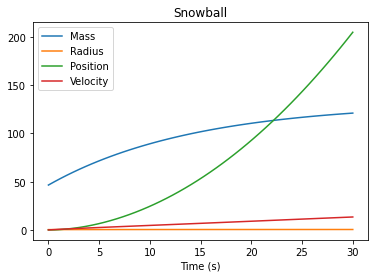

In [13]:
# Just to prove to ourselves that the answer is correct, let's calculate
# the final force using the optimized initial conditions

# Set initial conditions
w0 = [m0_opt,r0_opt,Snow.s0,Snow.v0]

# Load parameters
p = [m0_opt,Snow.C_d,Snow.g,Snow.rho,Snow.theta,Snow.rho_a,Snow.beta]

# Set up time array to solve for 30 seconds
t = np.linspace(0,30)

# Integrate forward
sol = odeint(Snow.snowball_dynamics,w0,t)

# Get kinetic energy
ke = 0.5 * sol[:,0][-1] * sol[:,3][-1]**2

# Get final stopping force
F = ke / sol[:,1][-1]
print('Final Force: ' + str(F))

# Final Position
print('Final Position: ' + str(sol[:,2][-1]))
print('Final Velocity: ' + str(sol[:,3][-1]))

# And some plots of the results
plt.figure()
plt.plot(t,sol[:,0],label='Mass')
plt.plot(t,sol[:,1],label='Radius')
plt.plot(t,sol[:,2],label='Position')
plt.plot(t,sol[:,3],label='Velocity')
plt.title('Snowball')
plt.xlabel('Time (s)')
plt.legend()